# DPCM Card Game Simulator

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis

In [10]:
results = pd.read_csv('../data/results.csv')

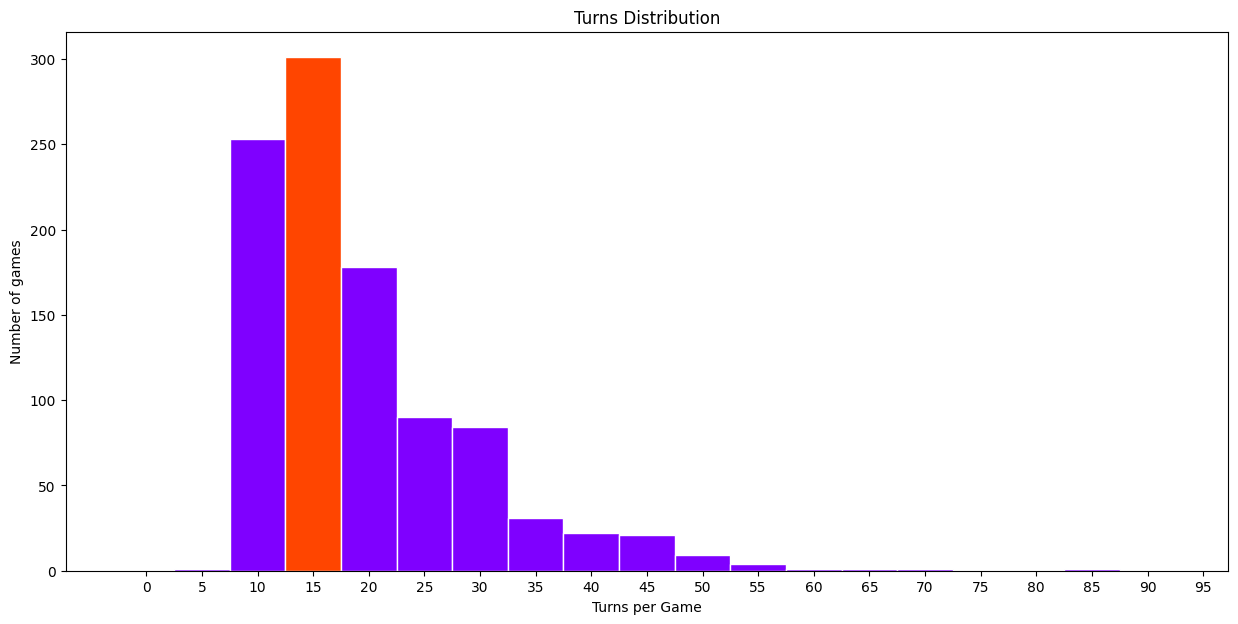

In [11]:
fig = plt.figure(1, figsize=(15, 7))

n, bins, patches = plt.hist(results['Turns'], bins=np.arange(0, max(results['Turns']), 5)-2.5, color = '#7f00ff', edgecolor = 'w')

x = range(max(results['Turns']))
plt.xticks(np.arange(min(x), max(x)+2, 5))

plt.title('Turns Distribution')

plt.xlabel('Turns per Game')
plt.ylabel('Number of games')

n = list(n)
patches[n.index(max(n))].set_fc('#ff4500')

plt.show()

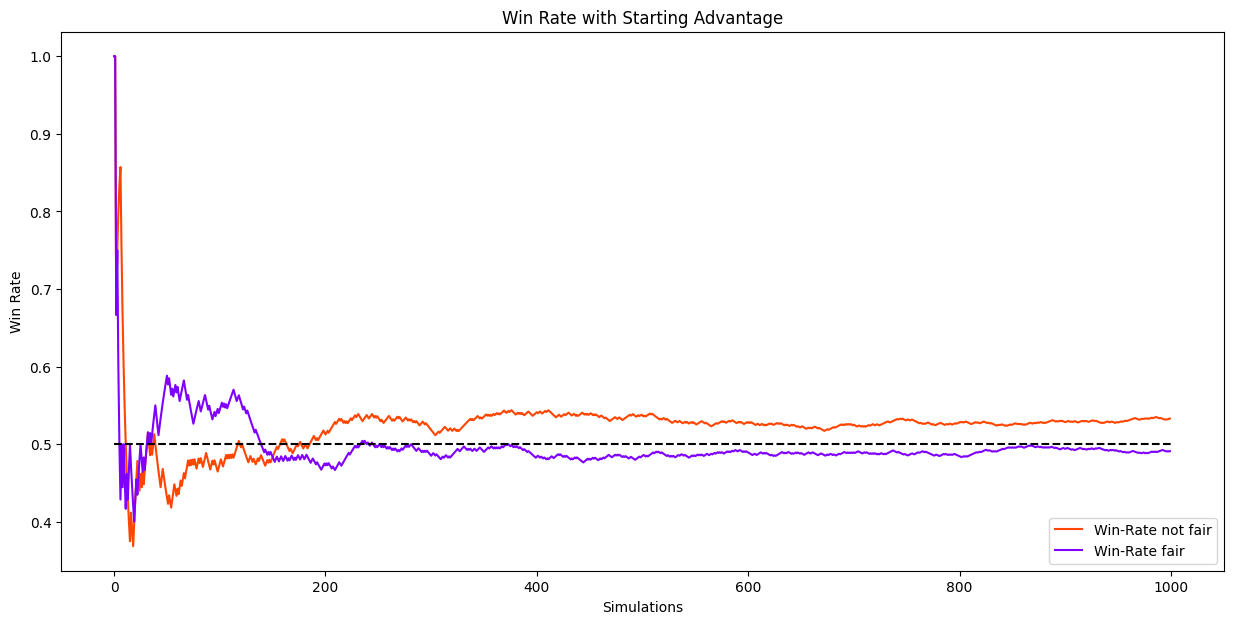

In [16]:
fig = plt.figure(1, figsize=(15, 7))

not_fair_file = 'not_fair.csv'
fair_file = 'fair.csv'

not_fair_df = pd.read_csv('../data/' + not_fair_file)
fair_df = pd.read_csv('../data/' + fair_file)

plt.plot(not_fair_df.index, not_fair_df['Rate'], color = '#ff4500', label='Win-Rate not fair')
plt.plot(fair_df.index, fair_df['Rate'], color = '#7f00ff', label='Win-Rate fair')

plt.hlines(0.5, 0, len(not_fair_df), colors='black', linestyles='dashed')

plt.title('Win Rate with Starting Advantage')

plt.legend(loc='lower right')

plt.xlabel('Simulations')
plt.ylabel('Win Rate')

plt.show()

In [17]:
print(f"{abs(not_fair_df['Rate'].iloc[-1] - fair_df['Rate'].iloc[-1])*100:.2f}%")

4.20%


#### Q-Values

In [ ]:
q_values = pd.read_csv('../data/q.csv')

In [4]:
visited = pd.read_csv('../data/visited.csv')

In [5]:
visited['MAX'] = visited.iloc[:, 1:].max(axis=1)

In [6]:
visited['HAND'] = visited['ID'].apply(lambda x: sum(eval(x)[3:]))

In [ ]:
q_values['MAX'] = q_values.iloc[:, 1:].max(axis=1)

In [ ]:
#q_values['ID'] = q_values.index

In [ ]:
q_values['HAND'] = q_values['ID'].apply(lambda x: sum(eval(x)[3:]))

In [ ]:
q_curve = q_values.copy()

In [ ]:
q_curve[['HAND","MAX"]] = q_curve[["HAND","MAX"]].replace(0, np.NaN)

q_mean = pd.Series(q_curve.iloc[:, 1:].groupby("HAND").mean()["MAX"])
q_max  = pd.Series(q_curve.iloc[:, 1:].groupby("HAND").max()["MAX"])
q_std  = pd.Series(q_curve.iloc[:, 1:].groupby("HAND").std()["MAX"])/2

In [ ]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(q_mean.index, q_mean, label="Mean", marker = "o")
plt.plot(q_max.index,  q_max,  label="Max",  marker = "o")
plt.fill_between(q_mean.index, q_mean-q_std, q_mean+q_std, alpha=0.2)

plt.xticks(q_mean.index)
plt.xlabel("Number of Minimum Hand Cards")
plt.ylabel("Q-Value")
plt.title("Aggregated Q-Values")
plt.legend()
plt.show()

In [ ]:
import matplotlib

print("Versione di Matplotlib:", matplotlib.__version__)

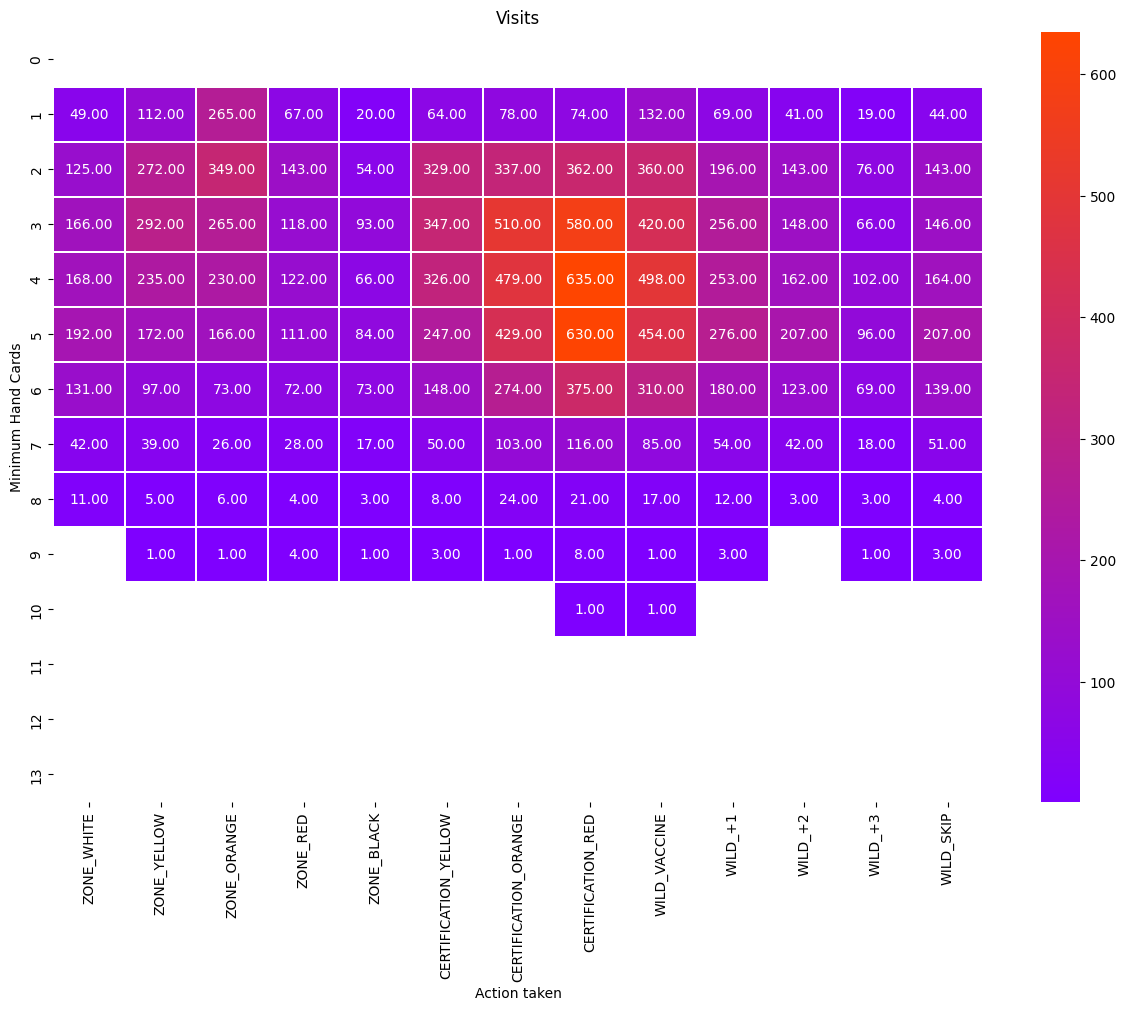

In [13]:
from matplotlib.colors import LinearSegmentedColormap

visited_pivot = visited.drop(columns='MAX').iloc[:, 1:].groupby("HAND").sum()
visited_pivot = visited_pivot.replace(0, np.NaN)

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

cmap_custom = LinearSegmentedColormap.from_list("custom", ['#7f00ff', '#ff4500'])

sns.heatmap(visited_pivot, 
            fmt=".2f", 
            linewidth = 0.3, 
            annot = True,
            cbar = True,
            cmap=cmap_custom)

ax.title.set_text("Visits")

ax.set(xlabel="Action taken", ylabel="Minimum Hand Cards")

plt.show()